In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from siphon.simplewebservice.wyoming import WyomingUpperAir

from urllib.error import HTTPError

In [2]:
date = datetime(2017, 1, 7, 0)
station = 'OAK'

In [3]:
df = WyomingUpperAir.request_data(date, station)

In [4]:
# get positive temps close to zero
df_temp_above_zero = df.loc[(df['temperature']>=1.0) & (df['temperature']<=3.0)]

In [5]:
df_temp_above_zero

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation
24,783.6,2134,2.4,-2.2,290.0,13.0,12.216004,-4.446262,OAK,72493,2017-01-07,37.73,-122.21,3.0


In [6]:
height_ML = np.mean(df_temp_above_zero['height'].values)

In [7]:
height_ML

2134.0

# LOOP through a month

In [8]:
start_date = '2017-01-01 00:00:00'
end_date = '2017-12-31 00:00:00'
daterange = pd.date_range(start_date, end_date, freq='12H')

In [9]:
%%time
height_ML_max = []
height_ML_min = []
height_ML_ave = []

for date in daterange:
    try:
        df = WyomingUpperAir.request_data(date, station)
        # get positive temps close to zero
        df_temp_above_zero = df.loc[(df['temperature']>=1.0) & (df['temperature']<=3.0)]
        height_ML_max_ = np.max(df_temp_above_zero['height'].values)
        height_ML_min_ = np.min(df_temp_above_zero['height'].values)
        height_ML_ave_ = np.mean(df_temp_above_zero['height'].values)
    except ValueError:
        height_ML_max_,height_ML_min_,height_ML_ave_ = np.nan, np.nan, np.nan
    except HTTPError:
        print('.')
        continue
    except NameError:
        print('-')
        continue
    
    height_ML_max.append(height_ML_max_)
    height_ML_min.append(height_ML_min_)
    height_ML_ave.append(height_ML_ave_)
    


CPU times: user 26.4 s, sys: 418 ms, total: 26.8 s
Wall time: 22min 58s


(0.0, 10000.0)

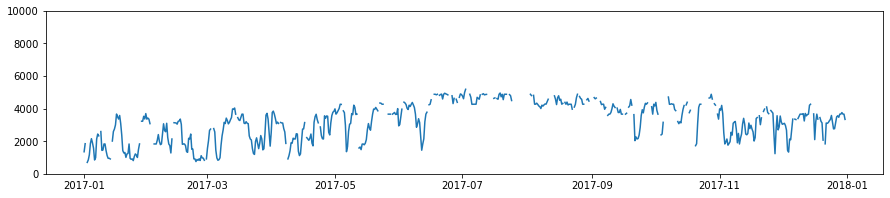

In [10]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(111)

ax1.plot(daterange, height_ML_ave)
ax1.set_ylim([0,10000])

(0.0, 10000.0)

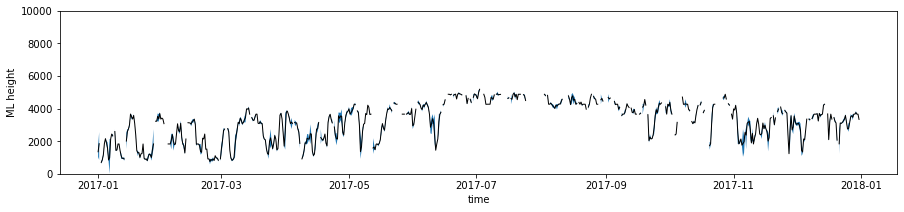

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,3))

ax1.fill_between(daterange, height_ML_min, height_ML_max)
ax1.plot(daterange, height_ML_ave,'k-', lw=1)
ax1.set_ylabel('ML height')
ax1.set_xlabel('time')
ax1.set_ylim([0,10000])